In [2]:
from sklearn import svm, datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [20]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df[47:150]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


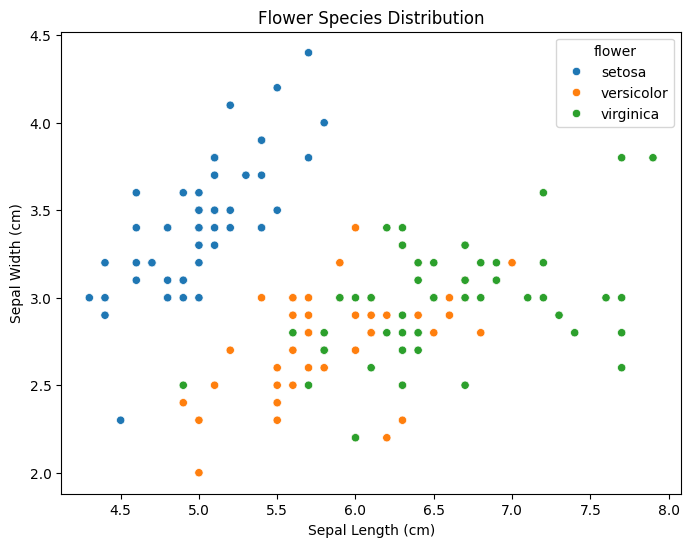

In [23]:
# Assuming you have a DataFrame 'df' with a 'flower' column that contains the flower species

# Create a scatter plot to visualize the flower species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='flower')
plt.title('Flower Species Distribution')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [5]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9333333333333333

In [6]:
print(cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5))
print(cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data, iris.target, cv=5))
print(cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5))

[1.         1.         0.9        0.96666667 1.        ]
[0.96666667 1.         0.96666667 0.96666667 1.        ]
[0.96666667 1.         0.9        0.96666667 1.        ]


**Above approach is tiresome and very manual. We can use for loop as an alternative**

In [7]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

<h3 style='color:blue'>Approach 3: Use GridSearchCV</h3>

In [8]:
clf=GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(iris.data,iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00099535, 0.00099664, 0.00079584, 0.00079722, 0.00099306,
        0.00099497]),
 'std_fit_time': array([8.92514713e-04, 8.84401178e-07, 3.97924680e-04, 7.45830409e-04,
        6.30497514e-04, 2.74916369e-06]),
 'mean_score_time': array([0.00099835, 0.00079947, 0.00059719, 0.00039873, 0.00060225,
        0.00039864]),
 'std_score_time': array([0.00062881, 0.00074885, 0.00048761, 0.00048834, 0.00049177,
        0.00048823]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [9]:
df=pd.DataFrame(clf.cv_results_)
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [10]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 1, 'kernel': 'rbf'}
0.9800000000000001


**Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation**

In [11]:
rs=RandomizedSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},
    cv=5,
    return_train_score=False,
    n_iter=2)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.98
1,1,rbf,0.98


**We use different models with different hyperparameters**

In [12]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}


In [16]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 10}
2,logistic_regression,0.966667,{'C': 5}


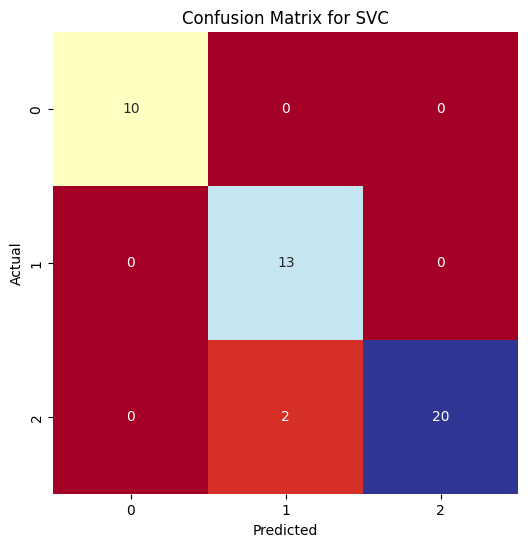

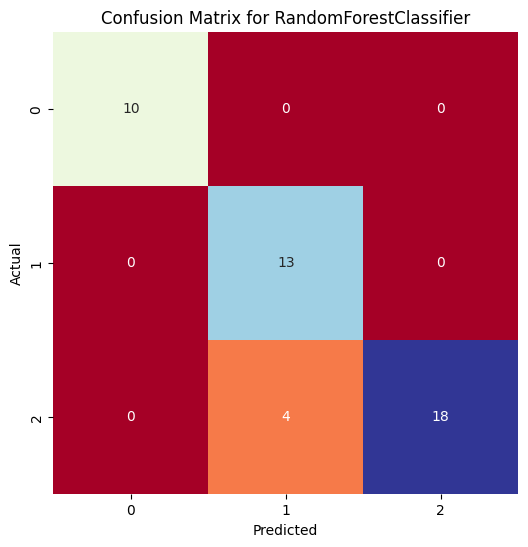

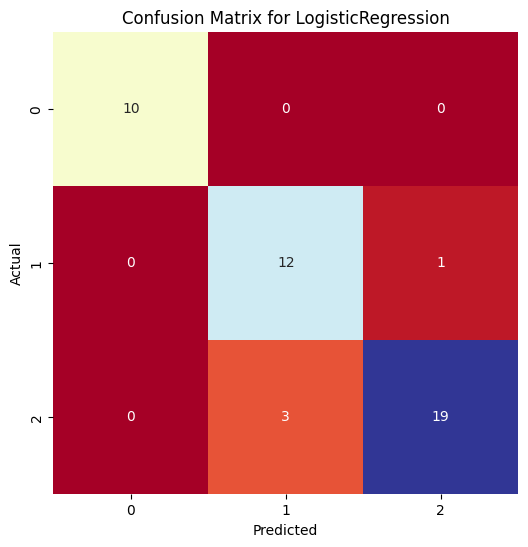

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to create and plot a confusion matrix with a custom color palette
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    
    # Define a custom color palette (you can choose any other palette you like)
    custom_palette = sns.color_palette("RdYlBu", as_cmap=True)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=custom_palette, cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()

# Create and plot confusion matrices for each model
models = {
    'SVM': svm.SVC(C=10, kernel='rbf', gamma='auto'),
    'Random Forest': RandomForestClassifier(n_estimators=5),
    'Logistic Regression': LogisticRegression(solver='liblinear', C=1)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Assuming you have split your data into training and test sets
    plot_confusion_matrix(model, X_test, y_test)


In [18]:
from sklearn.metrics import classification_report

# Create and print a classification report for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Assuming you have split your data into training and test sets
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=iris.target_names)
    print(f"Classification Report for {model_name}:\n{report}\n")


Classification Report for SVM:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.91      0.95        22

    accuracy                           0.96        45
   macro avg       0.96      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45


Classification Report for Random Forest:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.86      0.93        22

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versic